In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

Your Name and PRN:
- Name : Shubham Shaha
- PRN  : 240340128031
- Date : 16-05-2024

# Image Processing with Neural Network
## Assignment 02


## Take Perceptron implementation notebook and add sigmoid activation function

## Import Statements

In [2]:
###-----------------
### Import Libraries
###-----------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

## Setup Global Parameters

In [3]:
###----------------
### Some parameters
###----------------

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 10000  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

## Generate Data Set
<div style="font-family: Arial; font-size:1.2em;">
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.
</div>

In [4]:
X, y = datasets.make_moons(n_samples=N_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)   ### read dataset
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0], dtype=int64))

## Visualization
<p style="font-family: Arial; font-size:1.2em">
DataFrames are easier to visualize
</p>

In [5]:
data_df = pd.DataFrame(X, columns = ['A', 'B'])

data_df['target'] = y

data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [7]:
data_df.describe() # Generate descriptive statistic

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


In [8]:
# what labels are present?
data_df.target.unique()

array([0, 1], dtype=int64)

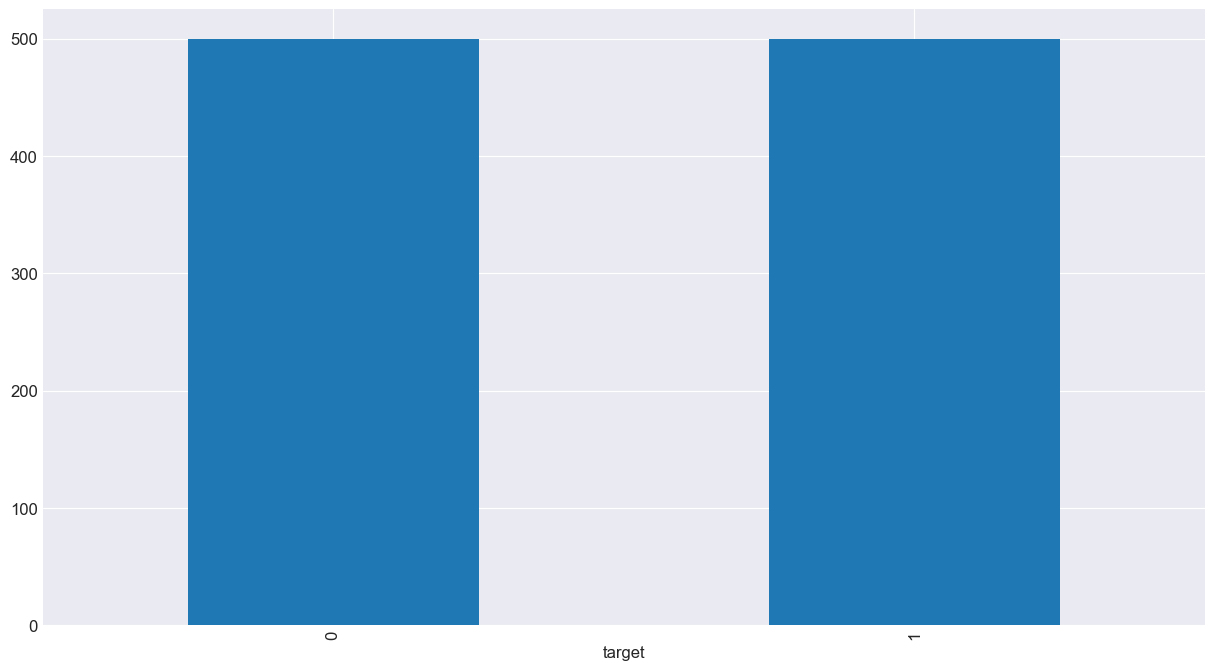

In [9]:
fig, ax = plt.subplots() # Instantiate
    
data_df['target'].value_counts().plot(ax=ax, kind='bar');

### Different ways of plotting data

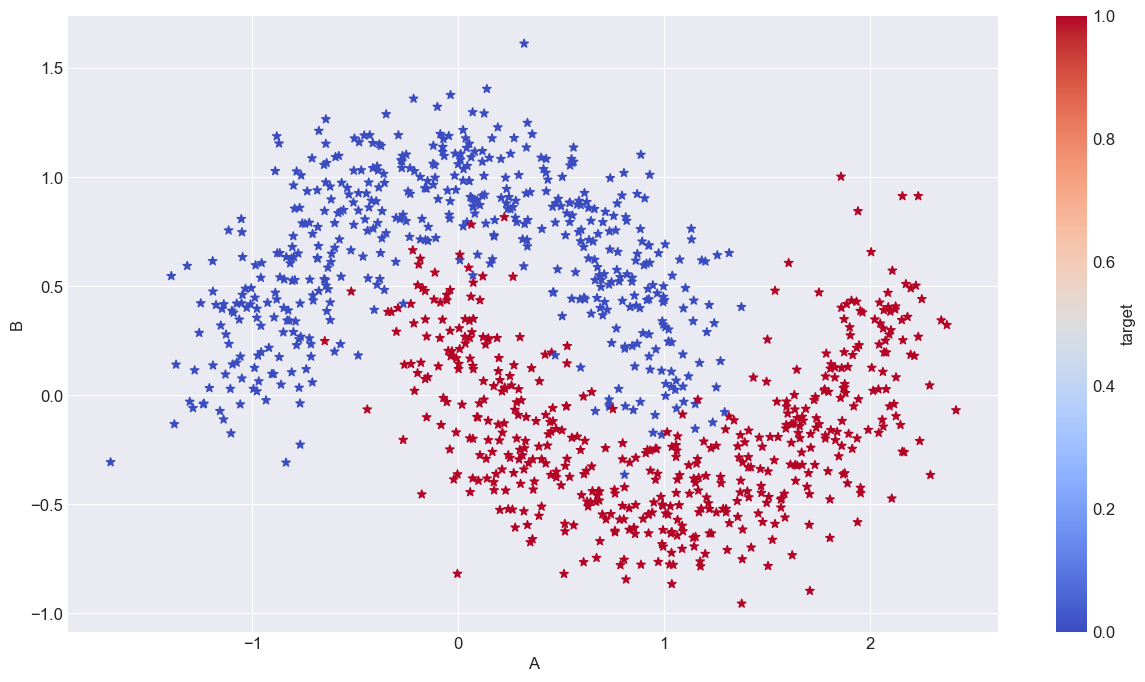

In [10]:
# Plot the data
data_df.plot.scatter('A', 'B',      # columns to plot
                     s = 40,        # size of the marker
                     marker = '*',  # type of marker
                     c = 'target',  # color as per target column
                     cmap=CMAP);    # using colormap

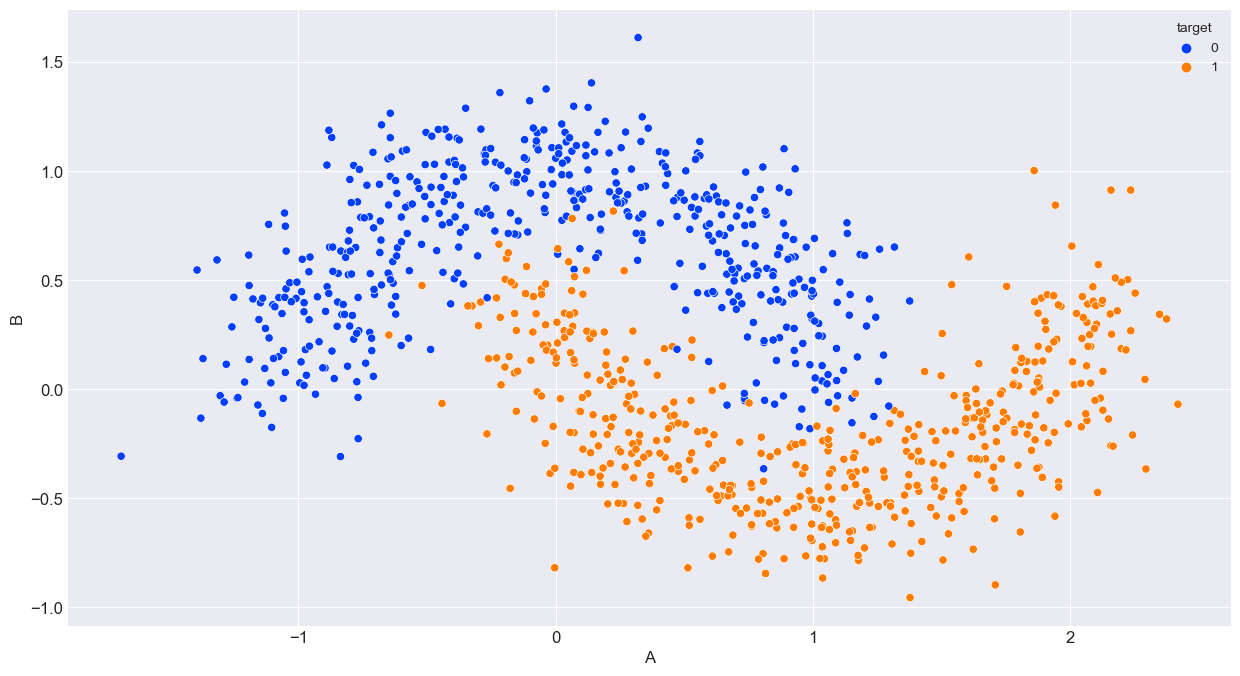

In [11]:
# Using Seaborn
ax = sns.scatterplot(data=data_df, # data from dataframe
                     x='A', y='B',  # X axis and y axis columns
                     palette=sns.color_palette("bright", 2), # color map
                     hue='target'); # Color as per target column

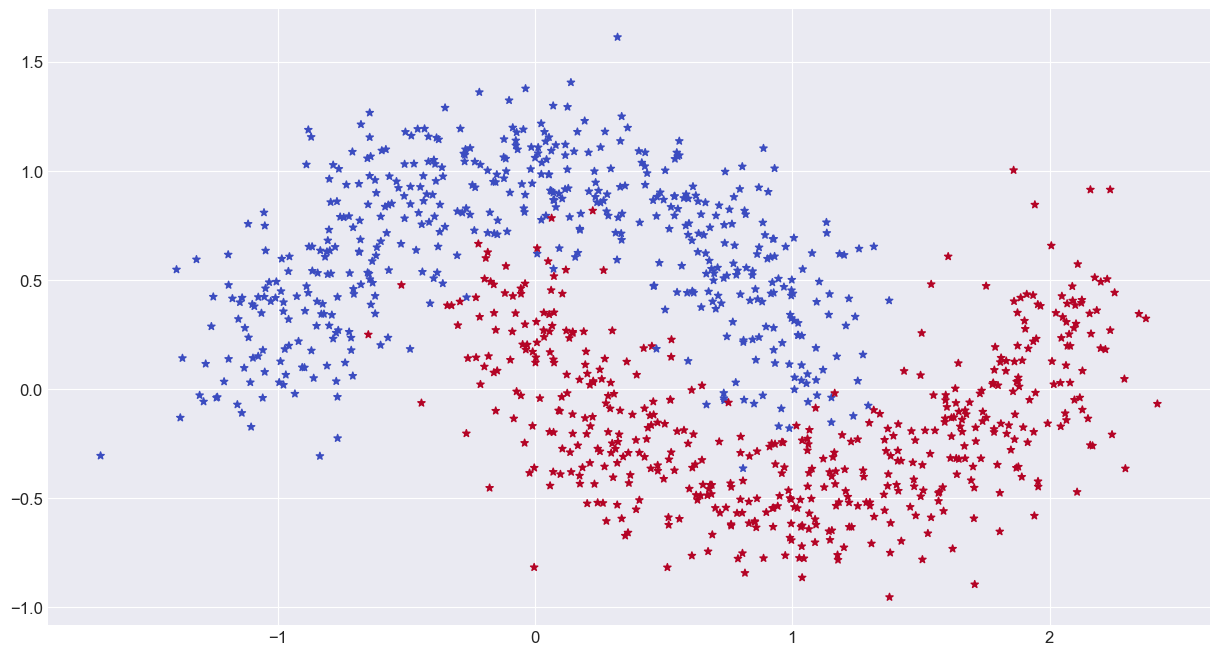

In [12]:
#### In case you want to plot X Array directly
plt.scatter(X[:,0], X[:,1], s=30, c=y, marker = '*', cmap=CMAP);

In [13]:
data_train,data_test = data_df.to_numpy()[:900],data_df.to_numpy()[900:]  ### train and test split for data

In [14]:
type(data_train) ## data type of data_train

numpy.ndarray

In [15]:
def predict(row,weights):
    z = weights[0] #### bias

    for i in range(len(row)-1):
        z+= weights[i+1]*row[i] #### y = m*x+b
    a = 1/(1+np.exp(-z)) #### activation function - sigmoid 
    return a

In [16]:
#### example 
wgts = [1.0,2.0,1.0]
predict(data_train[0],wgts)

0.9762318872720547

In [17]:
def train_weights(train, n_epochs, alpha):
    errors = []
    weights = rng.random(train.shape[1])  ###### random weights w0, w1,w2....
    m = train.shape[0]   ### no of samples in training data

    for epoch in range(n_epochs):
        sum_error = 0.0

        for row in train:
            prediction = predict(row,weights)  ### predict value for data in train
            dz = prediction-row[-1]    #### error in prediction and groud truth
            sum_error+= -row[-1]*np.log(prediction)  #####  metric for evaluating model(log loss)
            weights[0] -= alpha*dz/m ###update bias
            for i in range(len(weights)-1):
                weights[i+1] -= alpha*dz*row[i]/m ####### stochastic gradient descent (samplewise updating weights)
        errors.append(sum_error/m)  ### error for each epoch
    return errors,weights

In [18]:
errors,weights = train_weights(data_train, EPOCHS, ALPHA) ### training weights

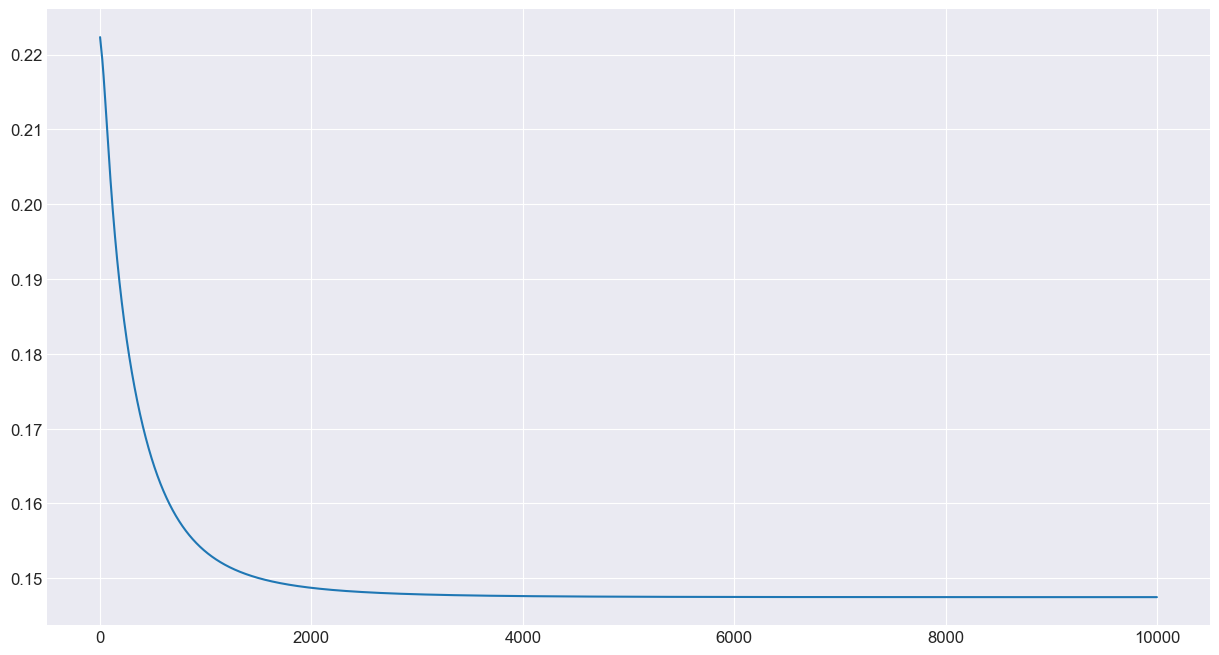

In [19]:
plt.plot(errors) ### plot error vs epoch

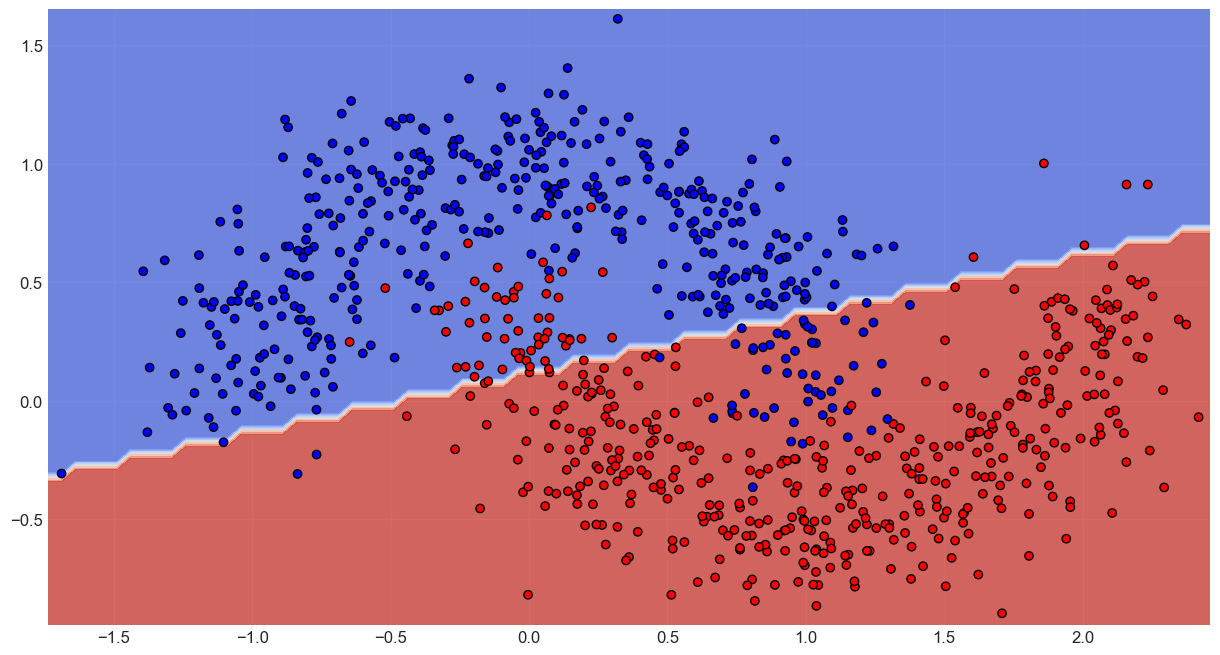

In [20]:
#### visualization of classification boundary 
X = data_train
fig,ax = plt.subplots() ### instatiation of plt object
dm = 0.05 ## spacing of grid
x_min, x_max = X[:,0].min()-dm, X[:,0].max()+dm
y_min, y_max = X[:,1].min()-dm, X[:,1].max()+dm

xx,yy = np.meshgrid(np.arange(x_min, x_max,dm), np.arange(y_min, y_max,dm))  #### generate mesh

XX = np.c_[xx.ravel(),yy.ravel()] ### prepare feature data
XX = np.hstack((XX,np.ones((XX.shape[0],1))))

y_pred = []
for row in XX:
    pred = predict(row,weights)
    y_pred.append(np.round(pred))  ### convert output of sigmoid (between 0 and 1) to 0 or 1 with threshold 0.5
Z = np.array(y_pred).reshape(xx.shape)

ax.contourf(xx,yy,Z,cmap = CMAP, alpha = 0.8)  ### plot boundary
ax.scatter(X[:,0],X[:,1],c = X[:,2],edgecolors = 'k',cmap = plt.cm.bwr) ### plot train data

In [21]:
prediction = []

for row in data_train :
    pred = predict(row,weights)
    prediction.append(np.round(pred)) ### convert output of sigmoid (between 0 and 1) to 0 or 1 with threshold 0.5

accuracy_score(data_train[:,-1],prediction) ### training accuracy

0.8666666666666667

In [22]:
cm = confusion_matrix(data_train[:,-1],prediction) ### confusion matrix for training data
cm

array([[385,  57],
       [ 63, 395]], dtype=int64)

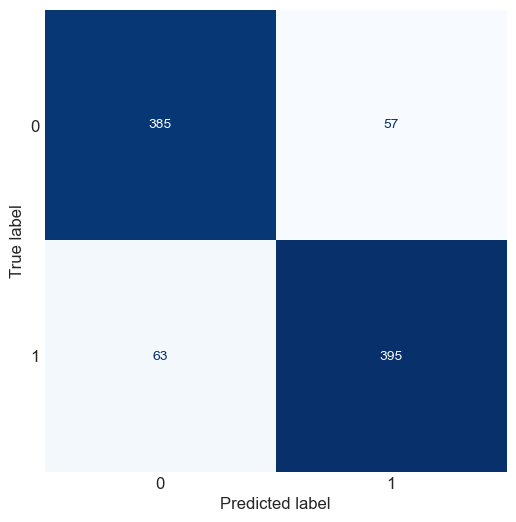

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=[0,1])

fig,ax = plt.subplots(figsize=(6,6))
disp.plot(ax = ax,cmap='Blues',colorbar = False)
ax.grid(False)
plt.show()

In [24]:
prediction = []

for row in data_test :
    pred = predict(row,weights)
    prediction.append(np.round(pred)) ### convert output of sigmoid (between 0 and 1) to 0 or 1 with threshold 0.5

accuracy_score(data_test[:,-1],prediction) ### testing accuracy

0.9

In [25]:
cm = confusion_matrix(data_test[:,-1],prediction) ### confusion matrix for testing data
cm

array([[55,  3],
       [ 7, 35]], dtype=int64)

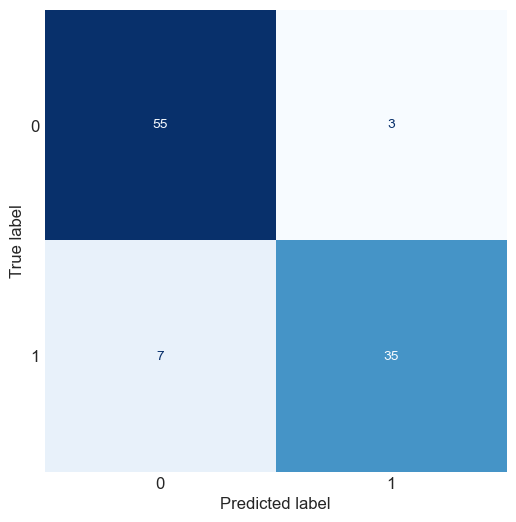

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=[0,1])

fig,ax = plt.subplots(figsize=(6,6))
disp.plot(ax = ax,cmap='Blues',colorbar = False)
ax.grid(False)
plt.show()